In [70]:
import rasterio
from os import listdir
from os.path import isfile, join

In [51]:
path = 'D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/LANDSAT08/LC08_L2SP_144048_20170102_20200905_02_T1'

In [54]:
files = [f for f in listdir(path) if isfile(join(path,f))]
print(files[0:19])

['LC08_L2SP_144048_20170102_20200905_02_T1_QA_RADSAT.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B1.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B2.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B3.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B4.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B5.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B6.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_B7.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_SR_QA_AEROSOL.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_ATRAN.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_B10.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_CDIST.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_DRAD.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_EMIS.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_EMSD.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_QA.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_TRAD.TIF', 'LC08_L2SP_144048_20170102_20200905_02_T1_ST_URAD.TIF'

In [57]:
# reading the metadata of first file
with rasterio.open(path+'/'+files[1]) as src0:
    meta = src0.meta
    meta.update(count = len(files[0:19]))

In [59]:
#read each layer and write it to stack
with rasterio.open('L8_01022017_1.tiff', "w",**meta) as dst:
        for id, layer in enumerate (files[0:19], start = 1):
            print(path+'/'+layer)
            with rasterio.open(path+'/'+layer) as src1:
                dst.write_band(id, src1.read(1))

D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/LANDSAT08/LC08_L2SP_144048_20170102_20200905_02_T1/LC08_L2SP_144048_20170102_20200905_02_T1_QA_PIXEL.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/LANDSAT08/LC08_L2SP_144048_20170102_20200905_02_T1/LC08_L2SP_144048_20170102_20200905_02_T1_QA_RADSAT.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/LANDSAT08/LC08_L2SP_144048_20170102_20200905_02_T1/LC08_L2SP_144048_20170102_20200905_02_T1_SR_B1.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/LANDSAT08/LC08_L2SP_144048_20170102_20200905_02_T1/LC08_L2SP_144048_20170102_20200905_02_T1_SR_B2.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM/RS/Labs/LANDSAT08/LC08_L2SP_144048_20170102_20200905_02_T1/LC08_L2SP_144048_20170102_20200905_02_T1_SR_B3.TIF
D:/rambabu_r@nrsc.gov.in/STUDY/MTECH/IIST GeoInformatics Text books/1 SEM

In [60]:
data = rasterio.open('L8_01022017_1.tiff')

In [61]:
data.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7681,
 'height': 7831,
 'count': 19,
 'crs': CRS.from_epsg(32644),
 'transform': Affine(30.0, 0.0, 91185.0,
        0.0, -30.0, 2036715.0)}

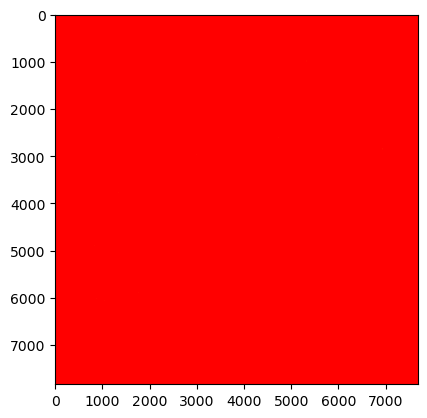

In [34]:
import rasterio
from matplotlib import pyplot
pyplot.imshow(LST.read(2), cmap='hsv')

In [32]:
band = LST.read(19)

In [33]:
band.flatten().max()

2353

In [43]:
desc = LST.descriptions
metadata = LST.meta

print('Raster description: {desc}\n'.format(desc=desc))

Raster description: (None, None, None, None, None, None)



In [62]:
# Open the fourth band in our image - NIR here
nir = data.read(7).astype(float)
red = data.read(6).astype(float)

In [63]:
from osgeo import gdal
import rasterio
import numpy as np
import matplotlib.pyplot as plt
dinom = nir+red
numer = nir-red
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [64]:
ndvi = np.where(dinom==0.0, 0.0, numer/dinom)

In [65]:
ndvi.flatten().max()

0.5407767628310443

In [66]:
ndvi.flatten().min()

-0.2098201304365887

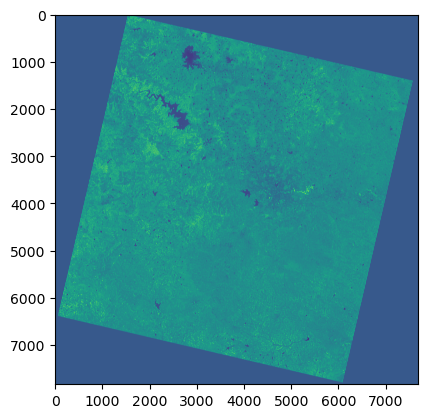

In [67]:
plt.figure()
plt.imshow(ndvi)

In [68]:
out_meta = data.meta.copy()

out_meta.update({'driver':'GTiff',
                 'width':LST.shape[1],
                 'height':LST.shape[0],
                 'count':1,
                 'dtype':'float64',
                 'crs':LST.crs, 
                 'transform':LST.transform,
                 'nodata':0})

In [69]:

with rasterio.open(fp=r'NDVI.tif', #outputpath_name
             mode='w',**out_meta) as dst:
             dst.write(ndvi, 1) # the numer one is the number of bands

with rasterio.open(fp=r'NDVI.tif', # outputpath_name
             mode='w',**out_meta) as dst:
             dst.write_band(1,ndvi) # the numer one is the number of bands